In [1]:
import sys
sys.path.append('/Users/sigridtragenap/Documents/FIAS/local_calc_selfcons/code_HFK')
import ferret
import ferret.mustela_datasets.dataset_class as DC
from ferret.mustela_datasets.parse_directory_structure import *
from skimage.transform import resize

from matplotlib.backends.backend_pdf import PdfPages
import os
import collections
import h5py
import numpy as np
from scipy import stats
from scipy import linalg
import scipy.io as sio
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.decomposition import PCA
from scipy import linalg

import matplotlib as mpl
from matplotlib import rc
rc('text',usetex=False)
rc('font',serif='CMU Sans Serif')
params = {
   'axes.labelsize': 18,
   'axes.spines.top'  : False ,
   'axes.spines.right'  : False ,
   'axes.linewidth' : 1.3,
   'font.size': 18,
   'legend.fontsize': 18,
   'xtick.labelsize': 16,
   'ytick.labelsize': 16,
   'xtick.major.top'      : False,
   'ytick.major.right'      : False,
   'figure.figsize': [4.5, 4.5],
   'lines.linewidth' : 2,
   #'errorbar.capsize' : 10,
'mathtext.fontset' : 'cm',
"figure.subplot.left"    : 0.2 , # the left side of the subplots of the figure
"figure.subplot.right"   : 0.9   , # the right side of the subplots of the figure
"figure.subplot.bottom"   : 0.17  ,  # the bottom of the subplots of the figure
"figure.subplot.top"     : 0.88 
}
mpl.rcParams.update(params)

N_min_pattern=10

In [2]:
def load_binoc_evoked_data(animal, condition_key='Binoc',load_time=True):
    #get dates
    all_dates=get_all_dates_for_ferret(animal)
    #dict
    grating_frames_all = {}
    #loop trough dates 
    for date in all_dates:
        try:
            ds = DC.Dataset(animal, date, 1)
            
            if load_time:
                list_tp=[1,8,16,24,31,39,46,54]
                label_tp=['0s', '0.5s', '1s', '1.5s', 
                             '2s', '2.5s', '3s','3.5s',]
                all_tp = np.load(
                    ds.get_path(day_wide_dir)+
                    'all_evoked_frames_2x_filter_BINOC.npz')[condition_key] 

                grating_frames_day={}
                for tp in range(len(list_tp)):
                    grating_frames_day[label_tp[tp]]= all_tp[tp]
                del all_tp     
                
            grating_frames_all.update({'{}'.format(date) : grating_frames_day})
        except Exception as e:
            print(e,animal, date)
            continue
    return grating_frames_all

In [6]:
for date, EO_key in zip(
        ['2018-01-18','2018-01-20','2018-01-22','2018-01-24','2018-01-26'],
        ['-2','+0','+2','+4','+6']):

    ds=DC.Dataset("2181", "{}".format(date), 1)
    pathname = ('/Users/sigridtragenap/Documents/FIAS/local_calc_selfcons/' 
    'DataAnalysisExample_FFRec/DevReliableRepresentations_DataExample/Data/Day_EO{}/'.format(EO_key))


    #load spont data
    all_spont = np.load(ds.get_path(day_wide_dir)+
                        'all_spont_frames_2x_filter.npy')

    #SPONT
    np.save(pathname+"spont_data.npy", all_spont)


    #load and save common ROI: product of general shape + bloodvessel mask
    roi_spont = np.isnan(all_spont[0])
    BV_mask2x = np.load(ds.get_path(ferret_wide_dir)+
                        'BV_mask2x.npy')
    mask=(~roi_spont)*BV_mask2x
    np.save(pathname+"/../commonROI.npy", mask)


    #load all evoked data
    all_tp = np.load(ds.get_path(day_wide_dir)+
                        'all_evoked_frames_2x_filter_BINOC_woBV.npz')

    #extract Binoc stimulation
    data = all_tp['Binoc'][:]  
    data[:,:,:,roi_spont]=np.nan
    N_tp, Ntrial, Nstim, Nx, Ny = data.shape
    np.save(pathname+"evoked_data_binocular.npy", data)


    #Contra
    data = all_tp['Contra'][:]
    data[:,:,:,roi_spont]=np.nan
    N_tp, Ntrial, Nstim, Nx, Ny = data.shape
    np.save(pathname+"evoked_data_contra.npy", data)


    #Ipsi
    data = all_tp['Ipsi'][:]
    data[:,:,:,roi_spont]=np.nan
    N_tp, Ntrial, Nstim, Nx, Ny = data.shape
    np.save(pathname+"evoked_data_ipsi.npy", data)

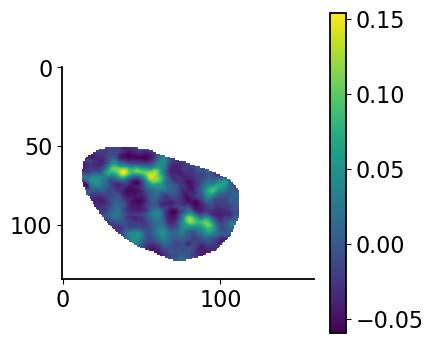

In [7]:
#plot activity of 0.5 seconds after stimulus onset for 5th stimulus in 1st trial

plt.imshow(data[1,0,5])
plt.colorbar()
plt.show()


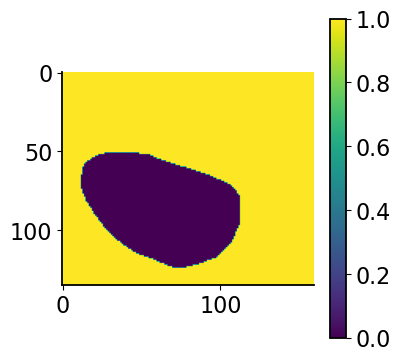

In [8]:
plt.imshow(roi_spont,
          interpolation=None)
plt.colorbar()

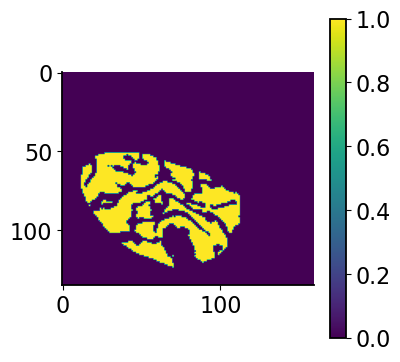

In [9]:
plt.imshow(mask,
          interpolation=None)
plt.colorbar()
plt.show()